In [381]:
import numpy as np
import matplotlib.pyplot as plt

In [382]:
x_size = 20
y_size = 20
h_size = 20 

LR = 0.1

In [383]:
np.random.seed(1)

U = np.random.randn(h_size, x_size) * 0.01
V = np.random.randn(h_size, h_size) * 0.01
W = np.random.randn(y_size, h_size) * 0.01
b = np.zeros((h_size, 1))
c = np.zeros((y_size, 1))

In [384]:
def run(xix, h0 = np.zeros((h_size, 1))):
    # one-hot encode x
    x = np.eye(x_size)[xix]
    
    # get length of x sequence
    seq_len = x.shape[0]
    
    # make sure x vector is represented in 2D space
    x = np.expand_dims(x, axis=2)
    
    # initialise vectors
    z = np.zeros((seq_len, h_size, 1))
    h = np.zeros((seq_len + 1, h_size, 1))
    o = np.zeros((seq_len, y_size, 1))
    p = np.zeros((seq_len, y_size, 1))
    
    # forward pass
    for t in range(seq_len):
        z[t]     = np.dot(U, x[t]) + np.dot(V, h[t]) + b
        h[t + 1] = np.tanh(z[t])
        o[t]     = np.dot(W, h[t + 1]) + c
        p[t]     = np.exp(o[t]) / np.sum(np.exp(o[t]))
        
    return p, h
    

In [385]:
def trainIter(xix, yix, h0 = np.zeros((h_size, 1))):
    # one-hot encode x and y
    x = np.eye(x_size)[xix]
    y = np.eye(y_size)[yix]
    
    # get length of x/y sequence
    seq_len = x.shape[0]
    
    # make sure x and y vectors are represented in 2D space
    x = np.expand_dims(x, axis=2)
    y = np.expand_dims(y, axis=2)
    
    # initialise vectors
    z = np.zeros((seq_len, h_size, 1))
    h = np.zeros((seq_len + 1, h_size, 1))
    o = np.zeros((seq_len, y_size, 1))
    p = np.zeros((seq_len, y_size, 1))
    
    loss = 0
    
    # forward pass
    for t in range(seq_len):
        z[t]     = np.dot(U, x[t]) + np.dot(V, h[t]) + b
        h[t + 1] = np.tanh(z[t])
        o[t]     = np.dot(W, h[t + 1]) + c
        p[t]     = np.exp(o[t]) / np.sum(np.exp(o[t]))
        loss   += -np.sum(y[t]*np.log(p[t]))
    
    # back propagation
    #dL/do
    dL_do = p - y
    
    # dL/dh
    dL_dh = np.zeros((seq_len, h_size, 1))
    
    # dh/dz - derivative of tanh(x) = 1 - tanh(x)^2
    dh_dz = 1 - h*h
    
    # dL/dh
    dL_dh[-1] = np.dot(W.T, dL_do[-1])
    for t in reversed(range(seq_len - 1)):
        dL_dh[t] = np.dot(W.T, dL_do[t])
        dL_dh[t] += np.dot(V.T, (dh_dz[t + 1] * dL_dh[t + 1]))
    
    # parameter gradients
    dL_dU = np.zeros((h_size, x_size))
    dL_dV = np.zeros((h_size, h_size))
    dL_dW = np.zeros((y_size, h_size))
    dL_db = np.zeros((h_size, 1))
    dL_dc = np.zeros((y_size, 1))
    
    for t in range(seq_len):
        dL_dU += np.dot(dh_dz[t]*dL_dh[t], x[t].T)
        dL_dV += np.dot(dh_dz[t]*dL_dh[t], h[t].T)
        dL_dW += np.dot(dL_do[t], h[t + 1].T)
        dL_db += dh_dz[t]*dL_dh[t]
        dL_dc += dL_do[t]
    
    return p, h, loss, dL_dU, dL_dV, dL_dW, dL_db, dL_dc 

Batch:  [[ 0  1  2]
 [ 1  2  3]
 [ 2  3  4]
 [ 3  4  5]
 [ 4  5  6]
 [ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]
 [11 12 13]
 [12 13 14]
 [13 14 15]
 [14 15 16]
 [15 16 17]
 [16 17 18]
 [17 18 19]]


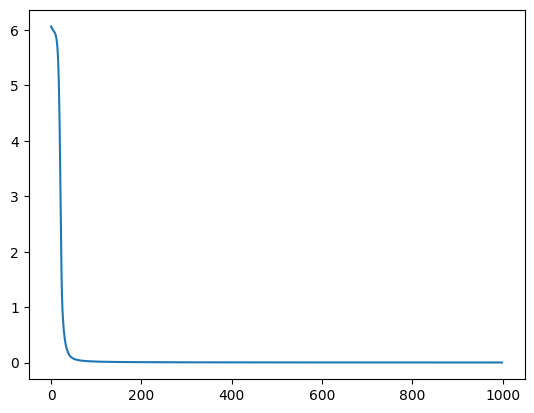

In [386]:

train_seq_len = 3

batch = np.array([ np.arange(i,i+train_seq_len) for i in range(int(y_size) - (train_seq_len - 1) ) ])
batch_size = batch.shape[0]

print("Batch: ", batch)

num_epochs = 1000

loss_history = np.empty(batch_size * num_epochs)
epoch_loss_avg = np.empty(num_epochs)

for epoch in range(num_epochs):
    for i in range(batch_size):
        
        p, h, loss, dU, dV, dW, db, dc = trainIter(batch[i, :-1], batch[i, 1:])

        loss_history[epoch*batch_size + i] = loss

        U -= LR * dU
        V -= LR * dV
        W -= LR * dW
        b -= LR * db
        c -= LR * dc

    epoch_loss_avg[epoch] = np.mean(loss_history[epoch*batch_size: (epoch+1)*batch_size])
    
plt.figure()
plt.plot(np.arange(num_epochs), epoch_loss_avg)
plt.show()

In [395]:
p, h = run([13, 14, 15, 16, 17, 18])
print(np.argmax(p, axis=1))

[[14]
 [15]
 [16]
 [17]
 [18]
 [19]]
